# 3.1 프로 야구 선수의 다음 해 연봉 예측하기
예제에 들어가기에 앞서 예측 분석의 가장 대표적인 방법인 회귀 분석을 살펴보겠습니다. 회귀 분석이란 독립변수(X)와 종속변수(Y) 간의 관계를 찾아내는 것입니다. 아래 그래프와 같은 일차 방정식 (Y=wX+b)을 예로 들 수 있습니다

위 그래프에서 회귀 분석이란 실제 데이터(빨간 점들)와 거리가 최소가 되는 방적식(선)을 찾아내는 것입니다. 즉, 방적식의 계수 w와 b를 정하는 것이라고 할 수 있습니다. 그렇다면 회귀 분석을 데이터 분서게 어떻게 적용하는 것일까요? 이를 우리에게 익숙한 표 형태의 데이터로 살펴봅시다. 아래의 표에서 '나이','몸무게' 피처는 방적식의 X1,X2, 그리고 '키'는 방적식의  Y로 정의할 수 있습니다. 여기에 X1의 영향력을 나타내는 w1,X2의 영향력을 나타내는 w2, 상수b를 사용하면 Y=w1X1+w2X2+b라는 방정식이 완성됩니다.

- index : X1(나이) : X2(몸무게) : Y(키)
- 1 : 23 : 65.3 : 175.5
- 2 : 14 : 32.5 : 141.0
- 3 : 17 : 71.1 : 166.4
- 4 : 18 : 63.3 : ??? <br>

회귀 분석은 표의 1~3번 데이터로 계수를 추정하는 것이라고 할 수 있습니다. 이를 통해 방정식의 계수를 추정하면 아직 알려지지 않은 4번 데이터의 키를 예측할 수 있습니다.<br>
여기서 1에서3번 데이터는 학습 전용 데이터셋, 그리고 4번 데이터는 테스트 전용 데이터셋이라고 합니다. 그리고 이러한 학습 방식을 지도 학습이라고 합니다. 지도 학습의 과정은 수험생의 공부 과정에 비유할 수 있습니다. 수험생은 모의고사를 정답과 함게 공부한 뒤, 이를 평가하는 실제 수능을 보기 때문입니다.

## 분석 미리보기
## 프로야구 선수들의 다음해 연봉을 예측해보자.

## Step1 탐색 : 프로야구 연봉 데이터 살펴보기
예제에서 사용할 연봉 데이터셋의 기본 정보를 살펴봅시다. 데이터의 기초 탐색결과는 다음과 같습니다. 프로야구 연보 데이터셋은 총 152개이며, 22개 피처로 구성되어 있습니다. 이 22개의 피처는 선수가 가지고 있는 기록(승,패,홈런 등의 수치)들에 대한 세부 정보를 나타냅니다.

#### 프로야구 연봉 데이터셋의 기본 정보 구하기

In [1]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Source : http://www.statiz.co.kr/
picher_file_path = 'data/picher_stats_2017.csv'
batter_file_path = 'data/batter_stats_2017.csv'
picher = pd.read_csv(picher_file_path)
batter = pd.read_csv(batter_file_path)

picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [2]:
picher.head()

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000


In [3]:
print(picher.shape)

(152, 22)


이번 예제에서 예측할 회귀 분석의 목표(Y값)는 데이터의 '연본(2018)'피처입니다. 다음 코드는 이를 히스토그램과 상자 그림으로 시각화한 것입니다.

#### 예측할 대상인 '연본'에 대한 정보

In [4]:
picher['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

### 한글 코드 실행 

Matplotlib에서 한글이 깨지지 않기 위함

In [5]:
# Matlab 한글 시 실행 코드
from matplotlib import font_manager, rc
import platform

plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


<AxesSubplot:>

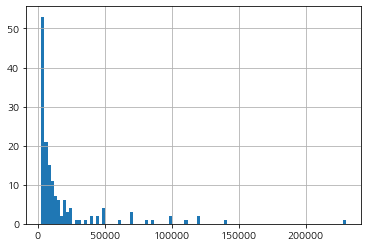

In [6]:
picher['연봉(2018)'].hist(bins=100) # 2018년 연봉 분포를 출력합니다.

<AxesSubplot:>

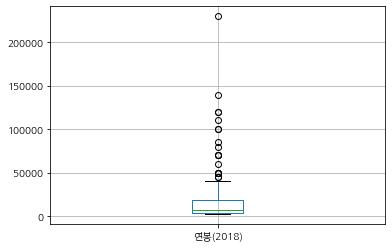

In [7]:
picher.boxplot(column=['연봉(2018)']) #연봉의 상자 그림을 출력합니다.

히스토그램에서 연봉의 분포를 파악할 수 있으며, 상자 그림에서는 연봉의 일반적인 범주를 파악할 수 있습니다. 흔히 말하는 '수십억대 연봉'을 받는 프로 선수는 별로 많지 않으며, 5억 원 미만의 연봉이 일반적인 것으로 보이는군요.<br>
다음으로 각각의 피처들은 어떤 특성을 가지고 있는지 살펴봅시다. 아래의 실행 결과는 '선수명'이나 '팀명'과 같이 그래프로 표현할 수 없는 피처들을 제외한 뒤, 모든 수치형 피처의 분포를 시각화한 것 입니다. 이를 통해 몇몇 피처들은 매우 불균형한 분포를 가지고 있다는 것을 알 수 있습니다.

#### 회귀 분석에 사용할 피처 살펴보기

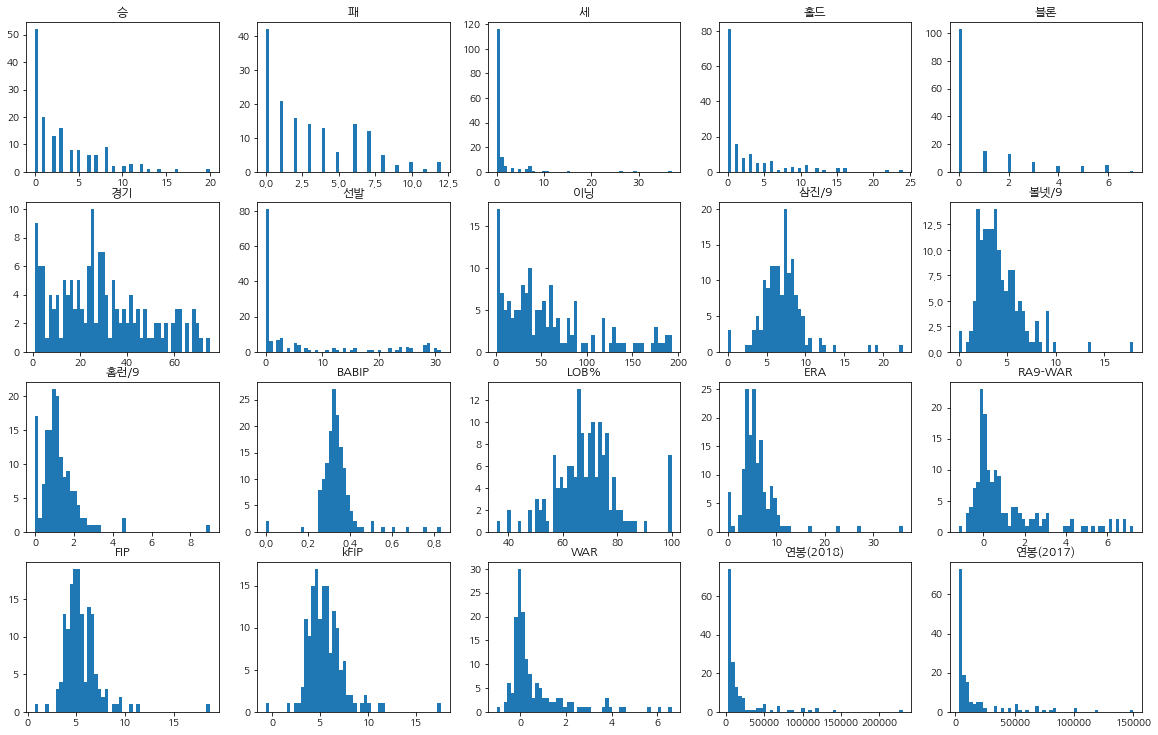

In [10]:
picher_features_df=picher[['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR',
                           'FIP','kFIP','WAR','연봉(2018)','연봉(2017)']]

# 피처 각각에 대한 히스토그램을 출력합니다.
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize']=[20,16]
    fig=plt.figure(1)
    # df의 열 개수 만큼의 subplot을 출력합니다.
    for i in range(len(df.columns)):
        ax=  fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50)
        ax.set_title(df.columns[i])
    plt.show()
    
plot_hist_each_column(picher_features_df)

또 한 가지 그래프를 통해 알 수 있는 것은 각 피처 간의 단위가 다르다는 것입니다. 예를 들어'홈런/9'라는 피처는 x축이 0~8 사이의 값인 반면, '이닝'이라는 피처는 0에서200 사이의 값을 포함하고 있습니다. 이러한 데이터는 피처의 정규화 혹은 스케일링이 되어있지 않은 데이터입니다.

## Step 2 예측: 투수의 연봉 예측하기

다음 코드에서는 여러 가지 피처 스케일링의 방법 중 표준화 방법을 적용하였습니다. 표준화는 정규 분포에서의 z-값을 구하는 과정과 동일합니다.
- z-값은 ((X)-(X의 평균)/X의 표준편차로 구합니다.

#### 피처들의 단위 맞춰주기: 피처 스케일링

In [11]:
# 판다스 형태로 정의된 데이터를 출력할 때 scientific-notation이 아닌 float 모양으로 출력되게 해줍니다.
pd.options.mode.chained_assignment

# 피처 각각에 대한 스케일링을 수행하는 함수를 정의합니다.
def standard_scaling(df,scale_columns):
    for col in scale_columns:
        series_mean=df[col].mean()
        series_std=df[col].std()
        df[col]=df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

# 피처 각각에 대한 스케일링을 수행합니다.
scale_columns=['승','패','세','홀드','블론','경기','선발','이닝','삼진/9','볼넷/9','홈런/9','BABIP','LOB%','ERA','RA9-WAR',
                           'FIP','kFIP','WAR','연봉(2017)']
picher_df=standard_scaling(picher, scale_columns)
picher_df=picher_df.rename(columns={'연봉(2018)':'y'})
picher_df.head(5)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,y,연봉(2017)
0,켈리,SK,3.313623,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.645175,...,-0.442382,0.016783,0.446615,-0.587056,3.174630,-0.971030,-1.058125,4.503142,140000,2.734705
1,소사,LG,2.019505,2.504721,-0.098502,-0.585705,-0.543592,0.059433,2.349505,2.547755,...,-0.668521,-0.241686,-0.122764,-0.519855,3.114968,-1.061888,-1.073265,4.094734,120000,1.337303
2,양현종,KIA,4.348918,0.907751,-0.306452,-0.585705,-0.543592,0.111056,2.554632,2.706808,...,-0.412886,-0.095595,0.308584,-0.625456,2.973948,-0.837415,-0.866361,3.761956,230000,5.329881
3,차우찬,LG,1.760682,1.227145,-0.306452,-0.585705,-0.543592,-0.043811,2.246942,2.350927,...,-0.186746,-0.477680,0.558765,-0.627856,2.740722,-0.698455,-0.760385,2.998081,100000,3.333592
4,레일리,롯데,2.537153,1.227145,-0.306452,-0.585705,-0.543592,0.059433,2.452068,2.587518,...,-0.294900,-0.196735,0.481122,-0.539055,2.751570,-0.612941,-0.619085,2.809003,111000,2.734705


연속형이 아닌 범주형 피처들은 어떻게 정규화할 수 있을까요? 범주형 피처에는 원-핫 인코딩이라는 방법을 적용해야 합니다. 판다스에서 get_dummies()라는 함수로 간단하게 원-핫 인코딩을 적용할 수 있습니다. 다음 실행 결과는 원-핫 인코딩의 적용 결과입니다.

#### 피처들의 단위 맞춰주기: 웟-핫 인코딩

In [12]:
# 팀명 피처를 원-핫 인코딩으로 변환합니다.
team_encoding=pd.get_dummies(picher_df['팀명'])
picher_df=picher_df.drop('팀명', axis=1)
picher_df=picher_df.join(team_encoding)
team_encoding.head(5)

,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화
0,0,0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0


이제 회귀 분석 모델을 학습시킬 준비가 거의 완료되었습니다. 한 가지 더 준비할 것은 모델의 학습 데이터셋(학습전용 데이터셋)과 모델의 테스트 데이터셋(테스트 전용 데이터셋)으로 데이터를 분리하는것입니다.<br>
파이썬에서는 sklearn이라는 모듈의 train_split() 함수로 이를 수행할 수 있습니다. 다음 코드의 실행 결과, (X_train, y_train):(X_test, y_test) =8:2 의 비율로 총 4개의 데이터가 생성됩니다. X_train과 y_train은 학습 데이터셋, 그리고 X_test와 y_test는 테스트 데이터셋을 의미합니다.

#### 회귀 분석을 위한 학습, 테스트 데이터셋 분리

In [13]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# 학습 데이터와 테스트 데이터로 분리합니다.
X=picher_df[picher_df.columns.difference(['선수명','y'])]
y=picher_df['y']
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=19)

이제 회귀 분석을 수행하는 코드를 살펴보겠습니다. 다음 코드에서는 sklearn 라이브러리의 LinearRegression()으로 모델 오브젝트를 선언한 뒤, 해당 오브젝트에 model=lr.fit(X_train,y_train) 코드를 실행시킵니다. 그러면 아래의 결과처럼 학습이 완료된 회귀식의 계수를 출력할 수 있습니다.

#### 회귀 분석 계수 학습 & 학습된 계수 출력

In [14]:
# 회귀 분석 계수를 학습합니다. (회귀 모델 학습)
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)

# 학습된 계수를 출력합니다.
print(lr.coef_)

[ -1481.01733901   -416.68736601 -94136.23649209  -1560.86205158
   1572.00472193   -747.04952389  -1375.53830289   -523.54687556
   3959.10653661    898.37638984  10272.48746451  77672.53804469
  -2434.38947427   -892.11801281    449.91117164   7612.15661812
   1271.04500059  -2810.55645139   5396.97279896  -4797.30275904
   -250.69773139    236.02530053  19130.59021357    854.02604585
   1301.61974637   3613.84063182   -935.07281796  18144.60099745]


## Step 3 평가: 예측 모델 평가하기
회귀 분석은 statsmodel 라이브러리의 OLS 클래스로도 실행이 가능합니다. OLS 클래스의 summary() 함수를 사용하면 다음의 실행 결과처럼 계수에 대한 자세한 분석 내용을 살펴볼 수 있습니다.

#### 어떤 피처가 가장 영향력이 강한 피처일까

In [15]:
import statsmodels.api as sm

# statsmodel 라이브러리로 회귀 분석을 수행합니다.
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     44.19
Date:                Wed, 29 Sep 2021   Prob (F-statistic):           7.70e-42
Time:                        18:28:28   Log-Likelihood:                -1247.8
No. Observations:                 121   AIC:                             2552.
Df Residuals:                      93   BIC:                             2630.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.678e+04    697.967     24.036      0.000    1.54e+04    1.82e+04
BABIP      -1481.0173   1293.397     -1.145      0.255   -4049.448    1087.414
ERA         -416.6874   2322.402     -0.179      0.858   -5028.517    4195.143
FIP        -9.414e+04   9.43e+04     -0.998      0.321   -2.81e+05    9.31e+04
KIA          303.1852   2222.099      0.136      0.892   -4109.462    4715.833
KT          3436.0520   2133.084      1.611      0.111    -799.831    7671.935
LG          1116.9978   2403.317      0.465      0.643   -3655.513    5889.509
LOB%       -1375.5383   1564.806     -0.879      0.382   -4482.933    1731.857
NC          1340.5004   2660.966      0.504      0.616   -3943.651    6624.652
RA9-WAR     3959.1065   2931.488      1.351      0.180   -1862.247    9780.460
SK          2762.4237   2243.540      1.231      0.221   -1692.803    7217.650
WAR         1.027e+04   2532.309      4.057      0.000    5243.823    1.53e+04
kFIP        7.767e+04   7.95e+04      0.977      0.331   -8.03e+04    2.36e+05
경기         -2434.3895   2953.530     -0.824      0.412   -8299.515    3430.736
두산           971.9293   2589.849      0.375      0.708   -4170.998    6114.857
롯데          2313.9585   2566.009      0.902      0.370   -2781.627    7409.544
볼넷/9        7612.1566   6275.338      1.213      0.228   -4849.421    2.01e+04
블론          1271.0450   1242.128      1.023      0.309   -1195.576    3737.666
삼성          -946.5092   2482.257     -0.381      0.704   -5875.780    3982.762
삼진/9        5396.9728   7286.221      0.741      0.461   -9072.019    1.99e+04
선발         -4797.3028   5489.352     -0.874      0.384   -1.57e+04    6103.463
세           -250.6977   1295.377     -0.194      0.847   -2823.059    2321.663
승            236.0253   2215.264      0.107      0.915   -4163.049    4635.100
연봉(2017)    1.913e+04   1270.754     15.055      0.000    1.66e+04    2.17e+04
이닝           854.0260   6623.940      0.129      0.898   -1.23e+04     1.4e+04
패           1301.6197   1935.935      0.672      0.503   -2542.763    5146.003
한화          5477.8879   2184.273      2.508      0.014    1140.355    9815.421
홀드          -935.0728   1637.923     -0.571      0.569   -4187.663    2317.518
홈런/9        1.814e+04   1.68e+04      1.082      0.282   -1.52e+04    5.14e+04
==============================================================================
Omnibus:                       28.069   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.274
Skew:                          -0.405   Prob(JB):                     6.52e-43
Kurtosis:                       9.155   Cond. No.                     3.93e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

위 실행 결과에서는 결정 계수(R-squared), 혹은 수정 결정 계수(Adj. R-squared)라는 점수를 눈여겨볼 필요가 있습니다. 이 점수들은 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?'에 대한 점수입니다. 이 점수들이 1에 가까울수록 데이터를 잘 설명하는 모델이라고 할 수 있습니다.

다음으로 F 통계량 (F-statistic) 이라는 수치를 살펴봅시다. F 통계량은 회귀식의 유의성 검정에 사용되는 값으로 F 통계량에 대한 P-value인 Prod(F-statistic) 수치와 함께 살펴봐야 합니다. 일반적으로 P-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다'라는 결론을 내려도 무방하며 이는 회귀 분석이 유의미한 결과를 가진다는 것입니다.<br>
또한 표의 P>|t|라는 정보는 각 피처의 검정 통계량(t-statistics)이 얼마나 유의미한지에 대한 p-value를 나타내는 것입니다. 위 분석에서는 'WAR','연봉(2017)','한화' 3개의 피처의 p-valuerk 0.05미만으로 나타났기 때문에 회귀 분석에서 유의미한 피처들이라는 결론을 내릴 수 있습니다. 다음으로 지금까지 학습한 coef(계수) 값들을 시각화하여 살펴봅시다.

#### 어떤 피처가 가장 영향력이 강한 피처일까

[Text(0, 0, 'const'),
 Text(1, 0, 'BABIP'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'KIA'),
 Text(5, 0, 'KT'),
 Text(6, 0, 'LG'),
 Text(7, 0, 'LOB%'),
 Text(8, 0, 'NC'),
 Text(9, 0, 'RA9-WAR'),
 Text(10, 0, 'SK'),
 Text(11, 0, 'WAR'),
 Text(12, 0, 'kFIP'),
 Text(13, 0, '경기'),
 Text(14, 0, '두산'),
 Text(15, 0, '롯데'),
 Text(16, 0, '볼넷/9'),
 Text(17, 0, '블론'),
 Text(18, 0, '삼성'),
 Text(19, 0, '삼진/9'),
 Text(20, 0, '선발'),
 Text(21, 0, '세'),
 Text(22, 0, '승'),
 Text(23, 0, '연봉(2017)'),
 Text(24, 0, '이닝'),
 Text(25, 0, '패'),
 Text(26, 0, '한화'),
 Text(27, 0, '홀드'),
 Text(28, 0, '홈런/9')]

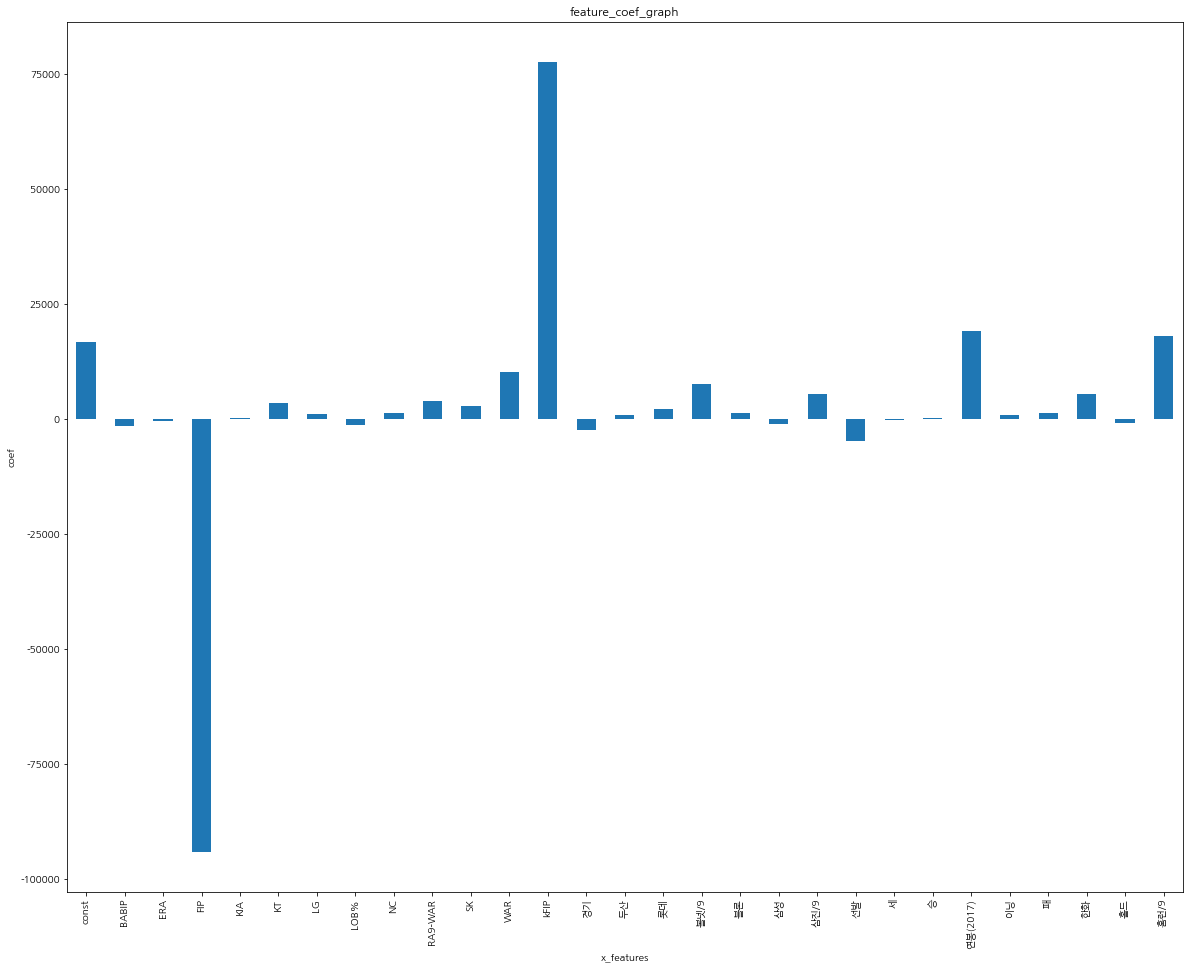

In [16]:
# 회귀 계수를 리스트로 반환합니다.
coefs=model.params.tolist()
coefs_series=pd.Series(coefs)

# 변수명을 리스트로 반환합니다.
x_labels=model.params.index.tolist()
# 회귀 계수를 출력합니다.
ax=coefs_series.plot(kind='bar')
ax.set_title('feature_coef_graph')
ax.set_xlabel('x_features')
ax.set_ylabel('coef')
ax.set_xticklabels(x_labels)

이에 대한 위 코드의 시각화 결과, FIP,WAR, 홈런, 작년 연봉 피처가 가장 영향력이 큰 것으로 보입니다. 현재까지의 피처 탐색결과는 다음과 같이 정리할 수 있습니다.
- 피처명 : 유의미한 피처인가? : 영향력이 큰 피처인가?
- FIP : X : O
- WAR : O : O
- 홈런 :  X : O
- 작년 연봉 : O : O
- 팀(한화) : O : △

다음으로 아래의 출력 결과는 수정 결정 계수(R2 score)를 sklean의 LinearRegression 클래스로 출력해봅시다.

#### 예측 모델의 평가하기: R2 score

In [17]:
# 학습 데이터와 테스트 데이터로 분리합니다.
X = picher_df[picher_df.columns.difference(['선수명','y'])]
y = picher_df['y']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=19)

#회귀 분석 모델을 학습합니다.
lr=linear_model.LinearRegression()
model = lr.fit(X_train,y_train)

# 회귀 분석 모델을 평가합니다.
print(model.score(X_train,y_train)) # train R2 score를 출력합니다.
print(model.score(X_test,y_test)) # test R2 score를 출력합니다

0.9276949405576705
0.8860171644977817


실행 결과의 각 값은 학습 데이터셋과 테스트 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋습니다. 만약 학습 점수가 테스트 점수에 비해 높다면 과적합이 발생한 것입니다. 모의고사에만 특화된 공부를 한 나머지, 실제 시험의 새로운 유형에 적응하지 못하는 경우라고 비유할 수 있습니다<br>
회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있습니다. 이 점수는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것입니다. 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미합니다. 다음 코드는 RMSE score를 출력한 것입니다.

In [18]:
#### 예측 모델의 평가하기: RMSE score

In [19]:
# 회귀 분석 모델을 평가합니다.
y_predictions=lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions=lr.predict(X_test)
print(sqrt(mean_squared_error(y_test,y_predictions))) # test RMSE score를 출력합니다.

7282.718684746371
14310.696436889135


이번에는 피처들의 상관 관계를 살펴보기 위해 heatmap 방식의 시각화를 사용하겠습니다. 이를 통해 승-이닝, kFIP-FIP, RA9_WAR-WAR 등의 피처 쌍에서 높은 연관성을 발견할 수 있습니다.

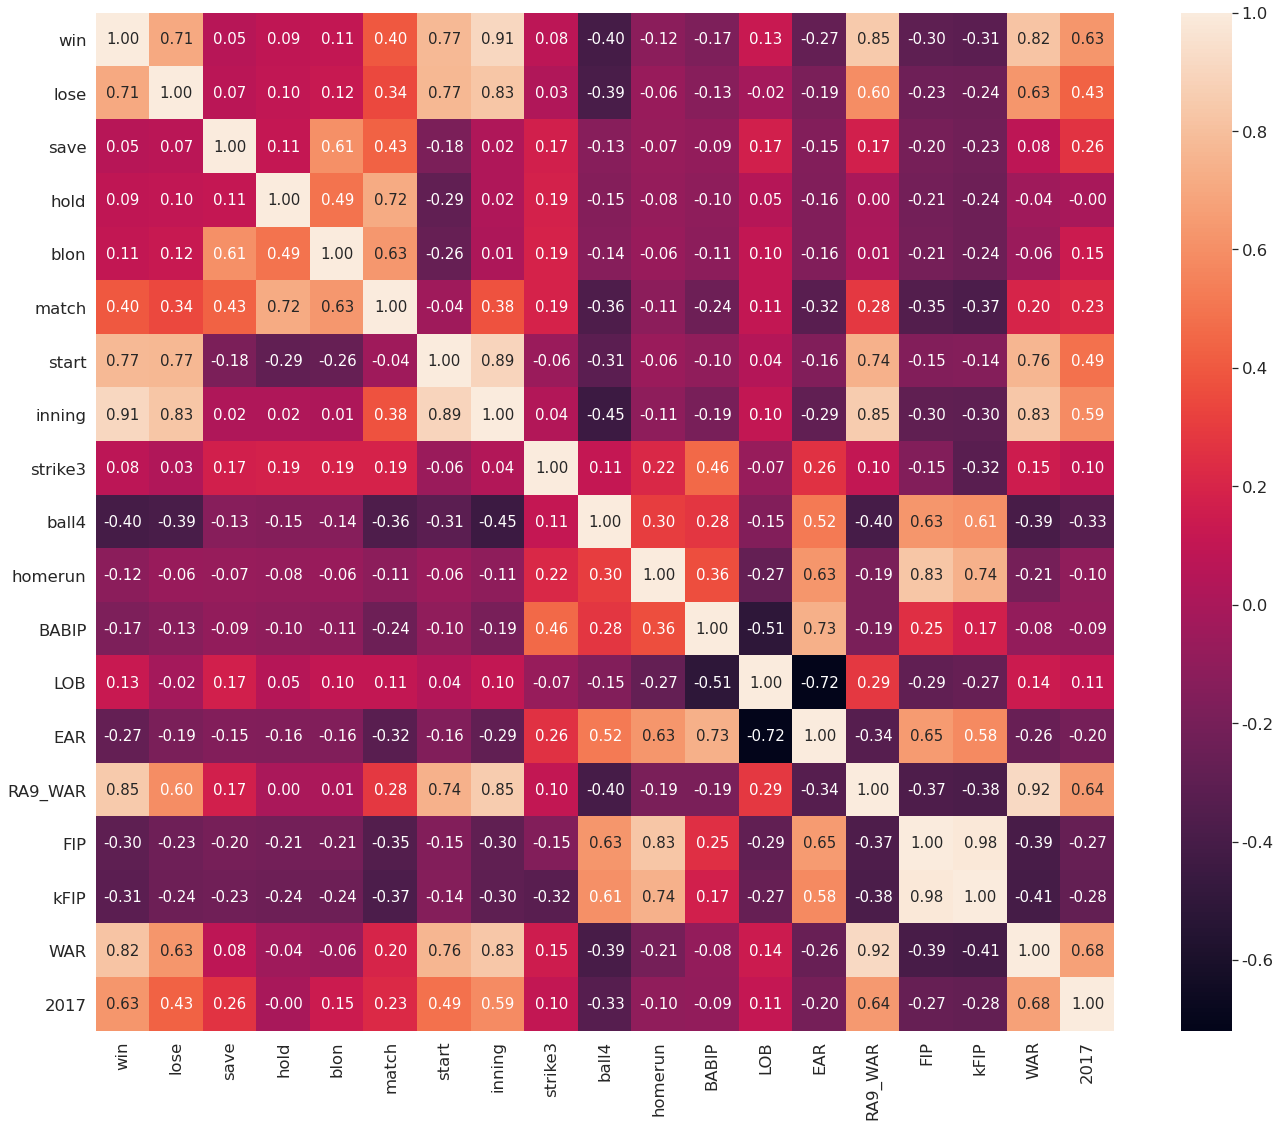

In [20]:
#### 피처들의 상관관계 분석하기
import seaborn as sns

# 피처 간의 상관계수 행렬을 계산합니다. 
corr=picher_df[scale_columns].corr(method='pearson')
show_cols=['win','lose','save','hold','blon','match','start',
           'inning','strike3','ball4','homerun','BABIP','LOB',
           'EAR','RA9_WAR','FIP','kFIP','WAR','2017']

# CORR 행렬 히트맵을 시각화합니다.
plt.rc('font',family='NanumGothicOTF')
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
              cbar=True,
              annot=True,
              square=True,
              fmt='.2f',
              annot_kws={'size':15},
              yticklabels=show_cols,
              xticklabels=show_cols)

plt.tight_layout()
plt.show()

하지만 회귀 분석은 피처 간의 ' 독립성'을 전제로 하는 분석 방법이기 때문에 올바른 회귀 분석을 하려면 이러한 피처 쌍을 제거해야 합니다. 그래서 다중 공선성이라는 것을 살펴봐야 합니다. 다중 공선성이란 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미합니다. 다중 공선성을 살펴봄으로써 여러 피처 간의 연관성을 고려했을 때 어떤 피처를 제거하는 것이 옳은 판단일지 혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해줄 수 있습니다.<br>
다중 공선선은 분산팽창요인(VIF)이라는 계수로 평가할 수 있습니다. 일반적으로 VIF 계수가 10~15 정도를 넘으면 그피처는 다중 공선성의 문제가 발생했다고 판단합니다 <br>
다중 공선성을 평가하는 코드는 다음과 같습니다.[variance_inflation_factor(X.values, i)for i in range(X.shape[1])라는 반복문을 통해 데이터의 각 피처마다 variance_inflation_factor() 함수를 적용해줍니다. 이를 실행한 결과, 많은 개수의 피처가 다중 공선성 문제를 가진 것을 알 수 있습니다.

#### 회귀 분석 예측 성능을 높이기 위한 방법: 다중 공선성 확인

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 피처마다의 VIF 계수를 출력합니다.
vif= pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"]= X.columns
vif.round(1)

,VIF Factor,features
0,3.2,BABIP
1,10.6,ERA
2,14238.3,FIP
3,1.1,KIA
4,1.1,KT
5,1.1,LG
6,4.3,LOB%
7,1.1,NC
8,13.6,RA9-WAR
9,1.1,SK


### `[미니 퀴즈 - 3.2]`
- `적절한 피처를 선정하여 다시 학습해 보세요.` 
    - 사용할 피처를 다시 고른 뒤, 다시 학습을 진행했을 때의 Train score, Test score가 어떻게 향상되는지 살펴봅니다.
        - 저자의 경우 아래의 과정을 거쳐 ['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)'] 피처를 선정했을 때, 더욱 좋은 결과를 나타냈습니다.
            - 선정 과정
                - 1. VIF 계수가 높은 피처들을 우선적으로 제거합니다. 단, (FIP, kFIP)와 같이 유사한 두가지 피처중에는 하나만을 제거합니다.
                - 2. 다시 공선성을 검증합니다. 이전 단계에서는 VIF 계수가 높았던 볼넷, 삼진 등의 피처의 VIF 계수가 낮아진 것을 확인할 수 있습니다. VIF 계수가 비정상적으로 높은 피처를 제거해주면, 다른 피처들의 공선성도 자연스레 감소하기 때문입니다.
                - 3. 여전히 VIF 계수가 높은 피처들을 제거합니다.
                - 4. 남은 피처를 토대로 다시한번 회귀분석을 실시합니다. 분석 결과에서 p-value가 유의하면서도 영향력이 큰 피처들을 선정합니다.
            - train_score, test_score를 비교했을 때, 기존보다 overfit이 비교적 덜 된것으로 보입니다
            - test rmse 역시 감소한 것을 볼 수 있습니다.

In [22]:
# 피처를 재선정합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
y = picher_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [23]:
# 모델을 학습합니다.
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [24]:
# 결과를 출력합니다.
print(model.score(X_train, y_train)) # train R2 score를 출력합니다.
print(model.score(X_test, y_test)) # test R2 score를 출력합니다.

0.9150591192570362
0.9038759653889865


In [25]:
# 회귀 분석 모델을 평가합니다.
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions))) # train RMSE score를 출력합니다.
y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions))) # test RMSE score를 출력합니다.

7893.462873347693
13141.866063591084


In [26]:
# 피처마다의 VIF 계수를 출력합니다.
X = picher_df[['FIP', 'WAR', '볼넷/9', '삼진/9', '연봉(2017)']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

,VIF Factor,features
0,1.9,FIP
1,2.1,WAR
2,1.9,볼넷/9
3,1.1,삼진/9
4,1.9,연봉(2017)


## Step 4 시각화:분석결과 시각화하기
마지막 단계에서는 회귀 분석을 통해 얻어낸 예측연봉과 2018년의 실제연봉 데이터를 비교하는 시각화 자료를 만들어봅시다.<br>
다음의 코드는 회귀 분석 모델의 predict() 함수를 사용하여 2018년의 연봉을 예측하고, 이를 원래의 데이터 프레임에 '예측연봉'이라는 새로운 열로 합치는 과정입니다. 전체 코드를 실행하면[선수명,실제연봉(2018), 예측연봉(2018), 작년연봉(2017)]을 columns로 하는 데이터 프레임을 출력할 수 있습니다. 단, 데이터 프레임을 생성할 때 한 가지 추가된 조건은 '재계약하여 연봉이 변화한 선수만을 대상으로 한다'는 조건입니다. 재계약 하지 않은 선수는 연봉에 변화가 없으므로 예측의 의미가 없기 떄문입니다.

#### 예측연봉과 실제연봉 비교하기

In [27]:
# 2018년 연봉을 예측하여 데이터 프레임의 열로 생성합니다.
X = picher_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
predict_2018_salary = lr.predict(X)
picher_df['예측연봉(2018)'] = pd.Series(predict_2018_salary)
# 원래의 데이터 프레임을 다시 로드
picher = pd.read_csv(picher_file_path)
picher = picher[['선수명', '연봉(2017)']]

# 원래의 데이터 프레임에 2018년 연봉 정보를 합친다.
result_df = picher_df.sort_values(by=['y'], ascending=False)
result_df.drop(['연봉(2017)'], axis=1, inplace=True, errors='ignore')
result_df = result_df.merge(picher, on=['선수명'], how='left')
result_df = result_df[['선수명', 'y', '예측연봉(2018)', '연봉(2017)']]
result_df.columns = ['선수명', '실제연봉(2018)', '예측연봉(2018)', '작년연봉(2017)']

# 재계약하여 연봉이 변화한 선수만을 대상으로 관찰
result_df = result_df[result_df['작년연봉(2017)'] != result_df['실제연봉(2018)']]
result_df = result_df.reset_index()
result_df = result_df.iloc[:10, :]
result_df.head(10)

,index,선수명,실제연봉(2018),예측연봉(2018),작년연봉(2017)
0,0,양현종,230000,163930.148696,150000
1,1,켈리,140000,120122.822204,85000
2,2,소사,120000,88127.019455,50000
3,4,레일리,111000,102253.697589,85000
4,7,피어밴드,85000,58975.725734,35000
5,13,배영수,50000,56873.662417,55000
6,21,안영명,35000,22420.790838,20000
7,22,채병용,30000,21178.955105,25000
8,23,류제국,29000,45122.360087,35000
9,24,박정진,25000,29060.748299,33000


이에 대한 데이터 프레임의 시각화 결과는 아래와 같습니다. 그래프에서 볼 수 있듯이 학습한 회귀 모델은 연봉 상승의 전체적인 경향을 비교적 잘 맞춰내고 있습니다. 피처가 몇 개 되지 않는 간단한 회귀 분석이라는 것을 생각해보면 기대한 것보다는 정확한 예측 결과라고 할 수 있습니다.

In [31]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


<AxesSubplot:xlabel='선수명'>

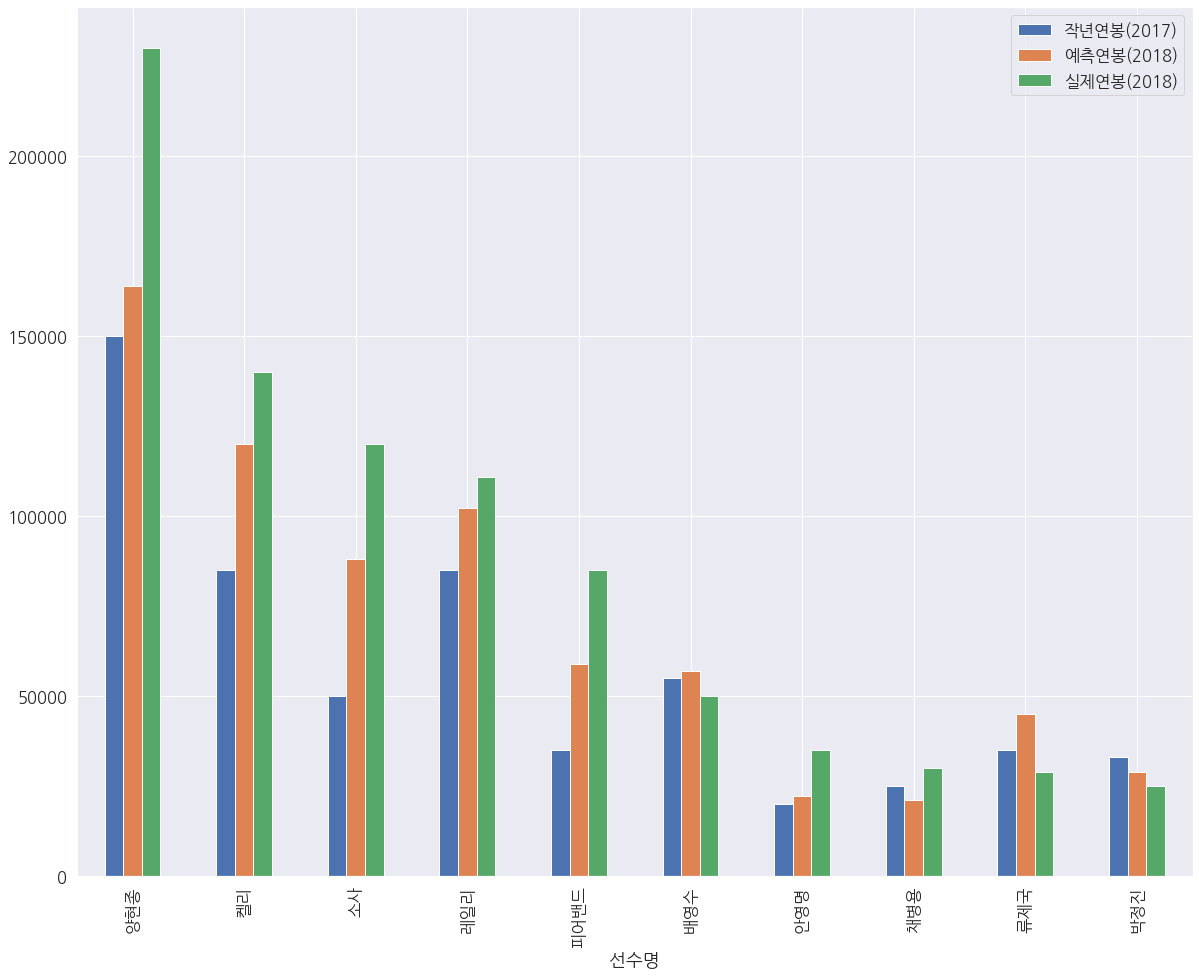

In [32]:
# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력합니다.
# mpl.rc('font', family='NanumGothicOTF')
# result_df.plot(x='선수명', y=['작년연봉(2017)','실제연봉(2018)'], kind="bar")

# 선수별 연봉 정보(작년연봉, 예측연봉, 실제연봉)를 막대 그래프로 출력한다.
result_df.plot(x='선수명', y=['작년연봉(2017)', '예측연봉(2018)', '실제연봉(2018)'],
              kind="bar")

지금까지 데이터 분석에서 가장 기초적인 예측 분석 방법인 회귀 분석을 알아보았습니다. 회귀 분석은 '머신러닝'을 비롯한 데이터 분석 기법 전반에 걸쳐 아주 중요한 개념이기 떄문에 중점적인 내용들을 반드시 이해고 넘어갑시다.

## 표로 정리하는 데이터 분석
- 주요 키워드 : 핵심내용 : 설명
- 데이터의 분리 : 학습 전용 데이터셋과 테스트 전용 데이터셋의 분리 : 회귀 분석 모델을 학습 전용 데이터셋으로 나누어 학습하고, 이를 테스트 전용 데이터셋으로 평가합니다. 이 과정을'지도 학습'이라고 부릅니다.
- 피처의 정규화 : 데이터의 피처 스케일링 : 피처 간의 단위를 맞춰주는 피처 스케일링 작업을 수행합니다.
- 범주형 피처의 변환 : 원-핫 인코딩 : 연산 불가능한 범주형 피처를 연산 가능한 벡터 형태의 피처로 변환합니다.
- 회귀 분석의 평가 : R2 score, RMSE score : R2 score, RMSE score 등의 평가 지표를 통해 회귀 분석이 얼마나 잘 되었는지 평가합니다.
- 다중 공선성 분석 : 피처 간의 독립성 검정 : VIF 계수를 통해 피처 간의 다중 공선성 문제를 검증합니다.

출처 : "이것이 데이터 분석이다 with 파이썬"